Amanda Gin - Colorado State University - MATH435 Project 2 
This code was written with reference to Khushi Shah's: How to do Cat and Dog Classification using CNN? (https://www.analyticsvidhya.com/blog/2021/06/beginner-friendly-project-cat-and-dog-classification-using-cnn/). Errors were troubleshooting using ChatGPT.

Let's first view some of our training data (provided by Dr. Aristoff). The first 99 images (64 x 64, greyscale) are of cat faces and the next 99 are of dog faces. The raw data can be found on GitHub for this project: https://github.com/goa225/CatDogClassificationCNN

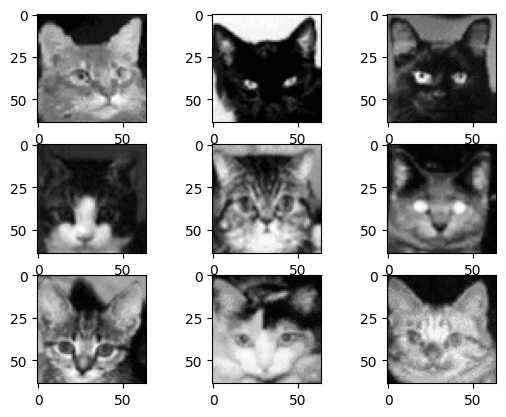

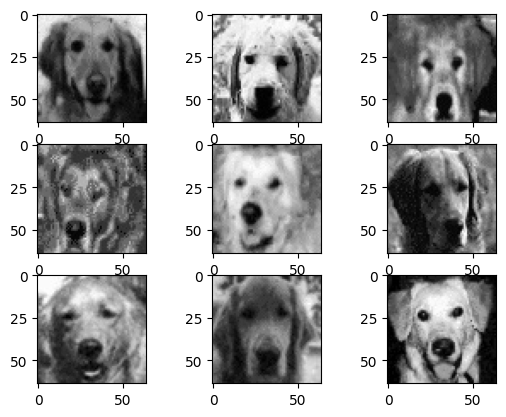

In [6]:
# Plot photos from the dogs vs cats training dataset
import os
import cv2
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

# Define location of dataset (dataset sourced from Dr. Aristoff)
folder = '/Users/amandagin/Downloads/train'
# Plot first 9 cat images
for i in range(9):
	# Define subplot
	pyplot.subplot(330 + 1 + i)
	# Define filename
	filename = os.path.join(folder,'testimage_' + str(i+1) + '.jpg')
	# Load image pixels
	image = imread(filename)
	# Plot raw pixel data
	pyplot.imshow(image, cmap='gray')
# Show the figure
pyplot.show()
# Plot first 9 dog images
for i in range(9):
	# Define subplot
	pyplot.subplot(330 + 1 + i)
	# Define filename
	filename = os.path.join(folder,'testimage_' + str(i+100) + '.jpg')
	# Load image pixels
	image = imread(filename)
	# Plot raw pixel data
	pyplot.imshow(image, cmap='gray')
# Show the figure
pyplot.show()

# Get the list of filenames of all JPG images in the folder
jpg_files = [f for f in os.listdir(folder) if f.endswith('.jpg')]

# Sort the filenames to maintain order
jpg_files.sort()

# Initialize an empty list to store the images
images = []

# Loop through each image file
for filename in jpg_files:
    # Read the image using OpenCV
    image = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
	# Resize the image to 64x64 (optional, if not already 64x64)
    image = cv2.resize(image, (64, 64))
    # Append the image to the list
    images.append(image)

# Convert the list of images into a NumPy array
images_array = np.array(images)

# Save the NumPy array as test.npy
np.save("train.npy", images_array)

Develop a baseline CNN with the following structure to classify cats and dogs:
1. Input layer.
2. Convolutional layer(1) with 32, 3 x 3 filters and a ReLU activation function. 
3. Max pooling layer(1) with a 2 x 2 window size.
4. Convolutional layer(2) with 64, 3 x 3 filters and a ReLU activation function. 
5. Max pooling layer(2) with a 2 x 2 window size.
6. Convolutional layer(3) with 128, 3 x 3 filters and a ReLU activation function. 
7. Max pooling layer(3) with a 2 x 2 window size.
8. Flatten layer which flattens the input data into a 1-D array (used to transition to the fully connected layer).
9. Fully connected dense layer with 128 neurons and a ReLU activation function. 
10. Modification of the fully connected layer using a Sigmoid activation function (places output between 0 and 1) for binary use. 
11. Backpropagation of the cost/loss function using an "Adam" optimizer and and the binary cross-entropy cost function.

We train this model using our training set of data. 

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Load dataset
photos = np.load('train.npy')

# Reshape the images to have a channel dimension of 1
photos = np.expand_dims(photos, axis=-1)

# Define labels (0 for cats, 1 for dogs)
num_cats = 99
num_dogs = 99
labels = np.concatenate((np.zeros(num_cats), np.ones(num_dogs)))

# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, choose epochs=25, batch_size=64
model.fit(photos, labels, epochs=25, batch_size=64)

model.save('CatsDogsCNN.h5')

2024-03-31 11:40:15.111381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25


/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5047 - loss: 41.9885
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.4949 - loss: 4.5774
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4869 - loss: 1.2650
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5694 - loss: 0.7649
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6822 - loss: 0.5940
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7872 - loss: 0.5320
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7953 - loss: 0.5101
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8380 - loss: 0.4184
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8714 - loss: 0.4041
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8482 - loss: 0.3626
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8044 - loss: 0.3985
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8791 - loss: 0.3248

Let's test our now trained model on a test data set of 110, 64 x 64 images of cat and dog faces from Alessia Sanna, Kaggle (https://www.kaggle.com/datasets/alessiosanna/cat-dog-64x64-pixel).

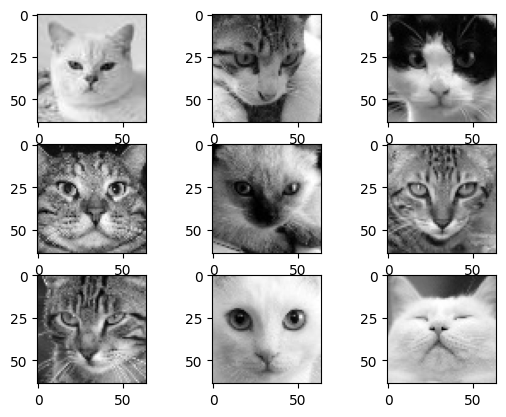

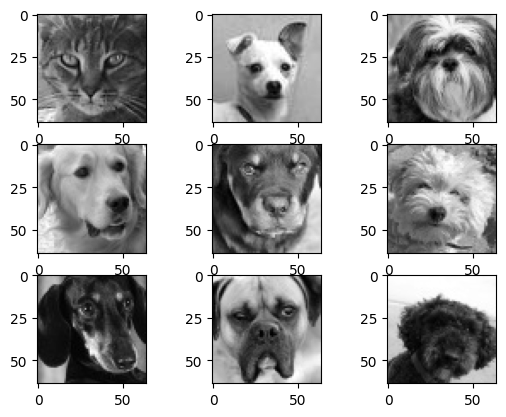

In [20]:
# Plot photos from the dogs vs cats testing dataset
import os
import cv2
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

# Define location of dataset (dataset sourced from Kaggle)
folder = '/Users/amandagin/Downloads/test'
# Plot first 9 cat images
for i in range(9):
	# Define subplot
	pyplot.subplot(330 + 1 + i)
	# Define filename
	filename = os.path.join(folder,'image_' + str(i+1) + '.jpg')
	# Load image pixels
	image = imread(filename)
	# Plot raw pixel data
	pyplot.imshow(image, cmap='gray')
# Show the figure
pyplot.show()
# Plot first 9 dog images
for i in range(9):
	# Define subplot
	pyplot.subplot(330 + 1 + i)
	# Define filename
	filename = os.path.join(folder,'image_' + str(i+55) + '.jpg')
	# Load image pixels
	image = imread(filename)
	# Plot raw pixel data
	pyplot.imshow(image, cmap='gray')
# Show the figure
pyplot.show()

# Get the list of filenames of all JPG images in the folder
jpg_files = [f for f in os.listdir(folder) if f.endswith('.jpg')]

# Sort the filenames to maintain order
jpg_files.sort()

# Initialize an empty list to store the images
images = []

# Loop through each image file
for filename in jpg_files:
    # Read the image using OpenCV
    image = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
	# Resize the image to 64x64 (optional, if not already 64x64)
    image = cv2.resize(image, (64, 64))
    # Append the image to the list
    images.append(image)

# Convert the list of images into a NumPy array
images_array = np.array(images)

# Save the NumPy array as test.npy
np.save("test.npy", images_array)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test Set Predictions:
Image 1: Dog (0.8889)
Image 2: Cat (0.0416)
Image 3: Dog (0.7809)
Image 4: Dog (0.9937)
Image 5: Cat (0.1257)
Image 6: Dog (0.7555)
Image 7: Dog (0.7213)
Image 8: Cat (0.1569)
Image 9: Cat (0.0435)
Image 10: Cat (0.0039)
Image 11: Cat (0.1704)
Image 12: Dog (0.8142)
Image 13: Cat (0.1645)
Image 14: Dog (0.6406)
Image 15: Dog (0.6921)
Image 16: Dog (0.5615)
Image 17: Cat (0.4421)
Image 18: Dog (0.7078)
Image 19: Dog (0.9998)
Image 20: Dog (0.9997)
Image 21: Cat (0.2227)
Image 22: Dog (0.9984)
Image 23: Cat (0.3813)
Image 24: Cat (0.0217)
Image 25: Dog (0.9090)
Image 26: Cat (0.2074)
Image 27: Cat (0.1791)
Image 28: Dog (0.8757)
Image 29: Cat (0.3609)
Image 30: Dog (0.6209)
Image 31: Dog (0.7088)
Image 32: Dog (0.8793)
Image 33: Cat (0.3212)
Image 34: Dog (0.9391)
Image 35: Cat (0.4880)
Image 36: Dog (0.6840)
Image 37: Dog (0.9386)
Image 38: Dog (0.5143)
Image 39: Dog (0.8457)
Image 40: Dog (0.9451)
Image 41: Dog (0.9549)
Image 

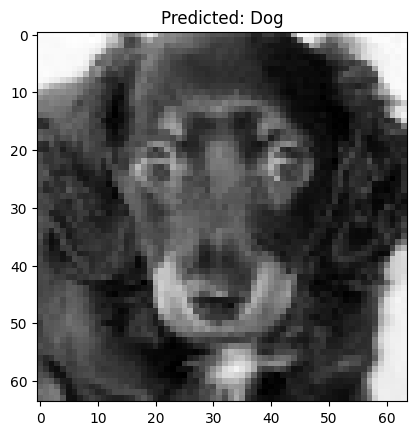

In [28]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = load_model('CatsDogsCNN.h5')  # Replace 'CatsDogsCNN.h5' with the path to your trained model

# Load the test data
test_data = np.load('test.npy')

# Preprocess the test data if necessary (e.g., normalize pixel values)
# ...

# Predict labels for the test data
test_predictions = model.predict(test_data)

# Output predictions for the test set
print("Test Set Predictions:")
for i, prediction in enumerate(test_predictions):
    # Determine if prediction corresponds to a dog (>0.5) or a cat (<=0.5)
    if prediction > 0.5:
        print(f"Image {i+1}: Dog ({prediction[0]:.4f})")
    else:
        print(f"Image {i+1}: Cat ({prediction[0]:.4f})")

# Load a random image for testing, change the path 
random_image_path = '/Users/amandagin/Downloads/test/image_100.jpg'  # Replace with the path to your random image
random_image = cv2.imread(random_image_path)
random_image = cv2.resize(random_image, (64, 64))  # Resize the image to 64x64
random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
random_image = random_image / 255.0  # Normalize pixel values

# Ensure the random image has the correct shape
random_image = np.expand_dims(random_image, axis=-1)  # Add channel dimension

# Predict the label for the random image
random_image_prediction = model.predict(np.array([random_image]))  # Need to pass an array, not a path

# Display the predictions for the random image
print("Random Image Prediction:")
for i, prediction in enumerate(random_image_prediction[0]):  # Iterate over predictions for each class
    # Determine if prediction corresponds to a dog (>0.5) or a cat (<=0.5)
    if prediction > 0.5:
        print(f"Class {i+1}: Dog ({prediction:.4f})")
    else:
        print(f"Class {i+1}: Cat ({prediction:.4f})")

# Visualize the random image along with the predicted label
predicted_class = "Dog" if random_image_prediction > 0.5 else "Cat"
plt.title(f"Predicted: {predicted_class}")
plt.imshow(random_image.squeeze(), cmap='gray')  # Display the random image
plt.show()
